---
title: "MLOps Card for OncoDerm AI"
execute:
  eval: true
  echo: false
jupyter: python3
---

In [1]:
from IPython.display import Image


---

**Date**: `2024-11-29`  
**Author**: `Sai Madhavan G`  
**Version**: `v1.0`  

---

### **Overview**  
This MLOps card serves as a comprehensive record of the tools, methodologies, and decision-making processes employed during the development and deployment of the OncoDerm AI project. The document aims to ensure transparency, reproducibility, and maintainability across the project's lifecycle.


## Workflow Management with Kedro

### Overview
We used **Kedro** to organize our workflow into modular, reusable components called **nodes** and **pipelines**. Kedro allows seamless integration of data engineering and machine learning tasks by clearly separating data, code, and configuration.

### Features of Kedro
- **Modular Workflow**: Nodes encapsulate individual tasks, which are then assembled into pipelines.
- **Data Catalog**: Facilitates streamlined handling of datasets.
- **Reproducibility**: Enhances collaboration and ensures reproducibility of experiments.
- **Configuration Management**: Centralized configuration for pipelines and datasets.
- **Visualization**: Interactive pipeline visualization using Kedro-Viz.

### Implementation
- **Pipeline Design**: Divided the classification task into stages—data preprocessing, model training, evaluation, and deployment.
- **Reusability**: Nodes for data preprocessing can be reused across different datasets.
- **Flexibility**: Easy to modify pipelines for different experiments without disrupting the overall workflow.

### Challenges
- Since all the pipelines are defined to be DAGs, we couldn't realize use cases where we needed a circular dependency between nodes.
- The learning curve for Kedro was steep initially, but the documentation and community support were helpful.
- Converting kedro pipelines to inference pipelines for deployment was not straightforward.

### Version and Installation
- **Version Used**: `Kedro 0.19.9`
- **Installation Command**:
  ```bash
  pip install kedro==0.19.9
  ```

### Resources
- [Kedro Documentation](https://docs.kedro.org/en/0.19.9/)

___

## Testing Strategy

### Overview
We adopted **pytest** as our primary testing framework, which integrates well with Kedro. The goal was to ensure that individual **nodes** and **pipelines** function as expected, enhancing the reliability of the workflow.

### Implementation
- **Unit Tests**: Unit tests were written for most nodes to validate their individual functionality. For example:
  - Testing data transformations in preprocessing nodes.
  - Verifying model predictions in evaluation nodes.
- **Test Coverage**: While many of nodes have been tested, some remain to be covered. These tests are planned to ensure full confidence in the pipeline's robustness.
- **Continuous Integration (CI)**: Integrated testing into CI pipelines to catch errors early in the development cycle using pre-commit hooks.

### Pytest Integration with Kedro
Kedro's structure makes it easier to write modular tests:
- Testing isolated nodes by mocking inputs and outputs.

### Challenges
- Some edge cases for untested nodes are still under review.

### Version and Installation
- **Version Used**: `pytest 8.3.3`
- **Installation Command**:
  ```bash
  pip install pytest==8.3.3
  ```

### Resources
- [Pytest Documentation](https://docs.pytest.org/en/stable/)
- [Kedro Testing Guide](https://docs.kedro.org/en/stable/development/automated_testing.html)

___


## Automated Documentation Generation

### Overview
To maintain up-to-date and user-friendly documentation for the project, we utilized **Quartodoc** and **Quarto**. These tools helped automate the generation of clear and structured documentation for both developers and stakeholders.

### Implementation
1. **Quartodoc**:
   - Used to extract docstrings from our codebase and generate API documentation.
   - Ensured consistency and minimized the manual effort of documenting changes in the code.
   - Simplified navigation through the project's functions, classes, and modules.

2. **Quarto**:
   - Served as the publishing tool for creating documentation in a variety of formats (e.g., HTML, PDF).
   - Enabled the integration of Quartodoc-generated API docs with explanatory text, diagrams, and project details.

### Features
- **Dynamic API Updates**: Whenever the codebase changes, documentation is regenerated to reflect the updates.
- **Markdown Integration**: Allowed seamless embedding of markdown for customization.

### Workflow
- **Documentation Generation**: The pipeline was integrated with the development process to trigger automatic documentation generation during builds using pre-commit hooks.
- **Integration with CI/CD**: Documentation can be auto-deployed to a hosted platform for easy access.

### Example Command
To generate documentation:
```bash
quartodoc build
quarto render
```

### Challenges
- **Custom Configurations**: Initial setup required additional effort to configure Quartodoc for the project's structure.
- **Consistency**: Ensuring all code had properly formatted docstrings to maximize automation benefits.
- **Resources**: Quartodoc didn't have a lot of community resources for troubleshooting.
- **Parser Not Working**: Some issues were faced with the parser not recognizing certain docstrings.

### Version and Installation
- **Version Used**: `Quartodoc 0.9.1`, `Quarto 1.2.57`
- **Installation Command**:
  ```bash
  pip install quartodoc==0.9.1
  ```
- [Quarto installation guide](https://quarto.org/docs/get-started/)

### Resources
- [Quartodoc Documentation](https://machow.github.io/quartodoc/get-started/overview.html)
- [Quarto Documentation](https://quarto.org/docs/guide/)

___

## Code Linting with Ruff

### Overview
To ensure code quality, maintain consistent styling, and catch potential bugs early, we integrated **Ruff** as the primary linting tool. Ruff is a fast and flexible Python linter designed to handle large projects efficiently.

### Key Benefits
- **Performance**: Processes codebases significantly faster than traditional linters.
- **Broad Rule Support**: Implements rules from popular linting tools like Flake8, pylint, and pyupgrade.
- **Customizability**: Allows fine-grained configuration for the project's specific requirements.

### Implementation
1. **Setup**:
   - A configuration file (`pyproject.toml`) was created to define project-specific rules and ignore patterns.
2. **Pre-Commit Hook**:
   - Integrated Ruff into the CI pipeline to enforce linting rules on every pull request.
3. **Codebase-wide Audit**:
   - Performed an initial pass with Ruff to identify and fix legacy code issues.

### Example Commands
To lint the codebase:
```bash
ruff check .
```
To fix linting issues automatically:
```bash
ruff check --fix .
```

### Challenges
- **Configuration Complexity**: Understanding and fine-tuning the rules to match the project's style guide.
- **False Positives**: Some rules flagged issues that were acceptable in the project context.

### Version and Installation
- **Version Used**: `Ruff 0.7.2`
- **Installation Command**:
  ```bash
  pip install ruff==0.7.2
  ```

### Resources
- [Ruff Documentation](https://docs.astral.sh/ruff/)
- [Kedro Linting Guide](https://docs.kedro.org/en/0.19.6/development/linting.html)
___

## Data Preprocessing Pipeline

### Overview
The data preprocessing pipeline is a crucial step in preparing the dataset for training. In this project, the pipeline addresses several challenges like class imbalance, data augmentation, normalization, and conversion into tensors. The key steps in the pipeline are:

1. **Handling Class Imbalance** using SMOTE (Synthetic Minority Over-sampling Technique).
2. **Data Augmentation** using random transformations like rotation, flipping, and color jitter.
3. **Normalization** of image pixel values.
4. **Resizing and Tensor Conversion** for consistency in input size and format.

### Key Functions

1. **Class Imbalance with SMOTE**:
   - The function `class_imbalance` uses the SMOTE technique to oversample the minority class in the dataset, which helps improve model performance when training on imbalanced data.
   - **Package Used**: `imblearn` (SMOTE)
   
2. **Data Augmentation**:
   - Augmentations such as horizontal and vertical flips, rotations, and color jitter are applied using the `torchvision.transforms` module.
   - **Package Used**: `torchvision`
   - The `data_aug` function generates new samples for the dataset by applying these transformations multiple times to each image.

3. **Normalization**:
   - The pixel values of the images are normalized to the range [0, 1] using the `normalizing_images` function.
   
4. **Resizing and Tensor Conversion**:
   - Images are resized to a fixed size (28x28) and converted to tensors using `tensoring_resizing` to ensure that they are in the correct format for model input.

### Data Flow

1. **Input Data**: The raw training and validation data (e.g., `train_raw`, `val_raw`) are passed through the pipeline.
2. **Nodes**:
   - **Class Imbalance**: SMOTE is applied to the training data to address class imbalance.
   - **Data Augmentation**: Random augmentations are applied to the training data to increase its diversity.
   - **Normalization and Resizing**: The images are normalized and resized to ensure they are in the correct format.
3. **Outputs**:
   - The final outputs are pre-processed training (`pre-processed_train_data`) and validation (`pre-processed_val_data`) datasets, which are ready for model training.

### How to Run

```bash
kedro run --pipeline data_preprocessing
```

### Challenges and Considerations

- **Class Imbalance**: SMOTE is a powerful technique for balancing the dataset, but it may create synthetic samples that do not perfectly represent real-world data. This can sometimes affect the model's generalization ability.
- **Augmentation**: While data augmentation improves model robustness, it may also introduce noise. Care must be taken to select meaningful augmentations that mimic real-world variations.
- **Normalization**: Proper normalization is essential for neural networks, especially when using pre-trained models, as it ensures consistency in input data.

### Version and Installation

- **SMOTE (imblearn)**:
  - Version: `0.12.4`
  - Installation:
    ```bash
    pip install imbalanced-learn==0.12.4
    ```

- **Torchvision**:
  - Version: `0.20.1`
  - Installation:
    ```bash
    pip install torchvision==0.20.1
    ```

- **PIL (Pillow)**:
  - Version: `11.0.0`
  - Installation:
    ```bash
    pip install Pillow==11.0.0
    ```


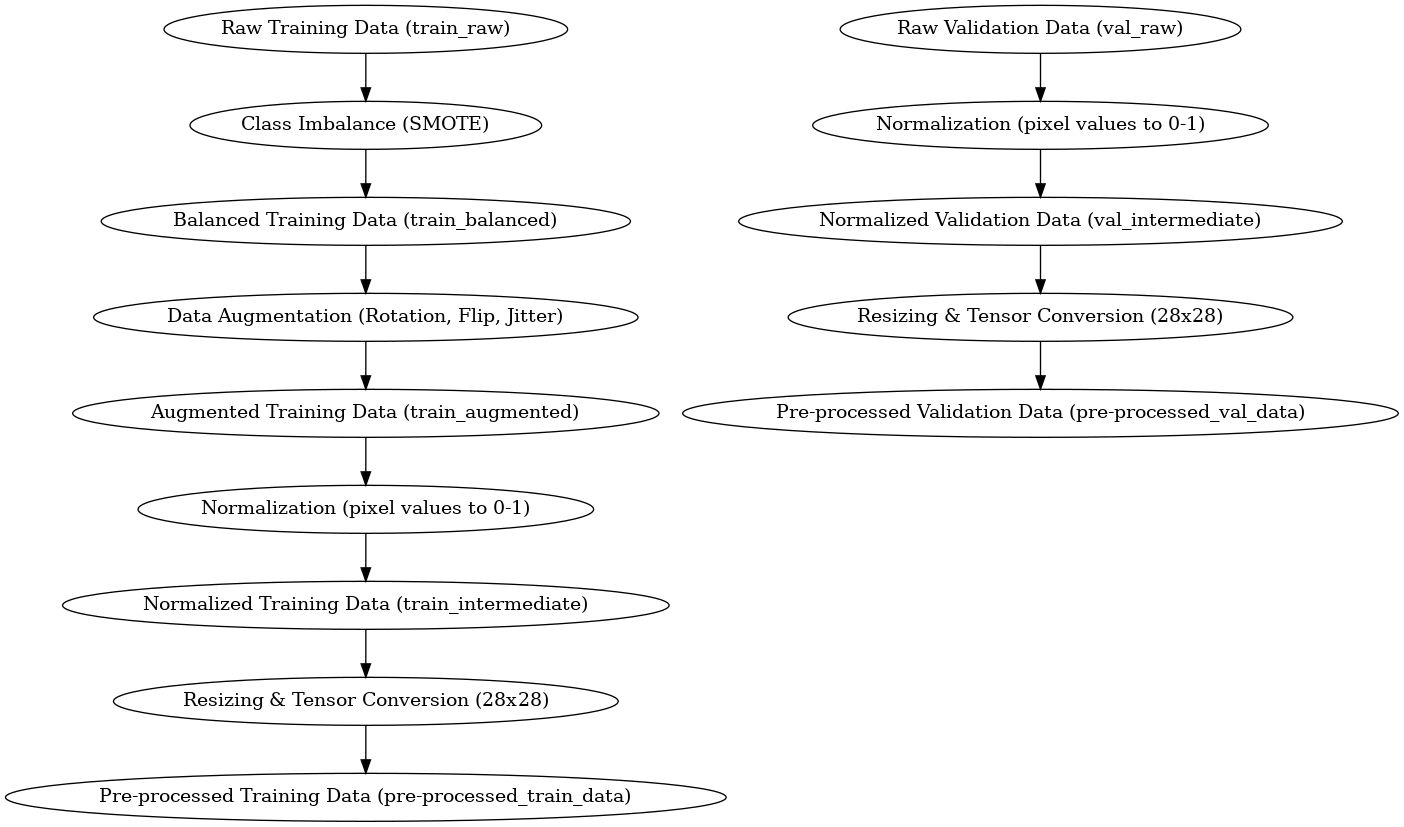

In [ ]:
from graphviz import Digraph

# Create a directed graph for the data preprocessing pipeline
dot = Digraph(comment="Data Preprocessing Pipeline")

# Add nodes for each stage
dot.node("A", "Raw Training Data (train_raw)")
dot.node("B", "Class Imbalance (SMOTE)")
dot.node("C", "Balanced Training Data (train_balanced)")
dot.node("D", "Data Augmentation (Rotation, Flip, Jitter)")
dot.node("E", "Augmented Training Data (train_augmented)")
dot.node("F", "Normalization (pixel values to 0-1)")
dot.node("G", "Normalized Training Data (train_intermediate)")
dot.node("H", "Resizing & Tensor Conversion (28x28)")
dot.node("I", "Pre-processed Training Data (pre-processed_train_data)")
dot.node("J", "Raw Validation Data (val_raw)")
dot.node("K", "Normalization (pixel values to 0-1)")
dot.node("L", "Normalized Validation Data (val_intermediate)")
dot.node("M", "Resizing & Tensor Conversion (28x28)")
dot.node("N", "Pre-processed Validation Data (pre-processed_val_data)")

# Add edges between the nodes
dot.edge("A", "B")
dot.edge("B", "C")
dot.edge("C", "D")
dot.edge("D", "E")
dot.edge("E", "F")
dot.edge("F", "G")
dot.edge("G", "H")
dot.edge("H", "I")
dot.edge("J", "K")
dot.edge("K", "L")
dot.edge("L", "M")
dot.edge("M", "N")

# Save the graph to a file and render as an image
output_path = "./images/data_preprocessing_pipeline"
dot.render(output_path, format="png", cleanup=True)


Image(filename=output_path + ".png")

## Model Training Pipeline

The **Model Training Pipeline** is responsible for preparing data, training a deep learning model, evaluating its performance, and logging the results for version control and reproducibility.

### Overview

This pipeline is built using **Kedro 0.19.8** and leverages **PyTorch**, **MLFlow**, and other utilities for efficient training and tracking. It includes the following stages:

1. **Data Preprocessing**: Transforms raw input data into a suitable format for training.
2. **Model Fine-tuning**: Uses a pre-trained model (e.g., ResNet18) and fine-tunes it on the dataset.
3. **Evaluation**: Computes key metrics such as accuracy, F1-score, precision, and recall on validation/test datasets.
4. **Logging**: Records model metrics, hyperparameters, and artifacts into **MLFlow** for tracking and comparison.
5. **Best Model Selection**: Identifies the best model version based on performance metrics (e.g., F1-score).

---

### Key Components

#### 1. **Preprocessing**
- Resizes images to \(224 \times 224\).
- Applies normalization with mean \([0.485, 0.456, 0.406]\) and standard deviation \([0.229, 0.224, 0.225]\).
- Converts image data to **PyTorch Tensors** for model compatibility.

#### 2. **Model Fine-tuning**
- Supports ResNet18 with an updated fully connected layer for 7 output classes.
- Optimizer: **Adam**.
- Loss Function: **CrossEntropyLoss**.
- Tracks training and validation performance after each epoch using **macro F1-score**.

#### 3. **Evaluation**
- Uses **classification_report** from Scikit-learn to compute detailed performance metrics.
- Outputs a dictionary summarizing accuracy, precision, recall, and F1-score.

#### 4. **Logging**
- Logs model artifacts and metrics to **MLFlow**:
  - Model weights and architecture.
  - Training/validation F1-score trends.
  - Loss curves.
- Enables reproducibility with experiment tracking.

#### 5. **Best Model Selection**
- Automatically identifies and selects the best-performing model version using MLFlow’s client API.

---

### Pipeline Nodes

1. **Preprocess Data Input**
    - Input: `pre-processed_train_data`, `pre-processed_val_data`.
    - Output: `train_dataset`, `val_dataset`.

2. **Model Fine-tuning**
    - Input: Preprocessed datasets, model name, training parameters, device.
    - Output: Fine-tuned model weights, training loss plot.

3. **Evaluate Model**
    - Input: Model name, weights, test dataset, batch size, device.
    - Output: Performance metrics dictionary.

4. **Log Model**
    - Input: Model name, weights, hyperparameters, metrics, training loss plot.
    - Output: MLFlow URI.

5. **Set Best Model URI**
    - Input: Model name, MLFlow URI.
    - Output: Best model URI, loaded model.

---

### Tools and Libraries

| Library          | Purpose                                               | Version  |
|-------------------|-------------------------------------------------------|----------|
| **PyTorch**      | Deep learning framework                               | 2.5.1 |
| **MLFlow**       | Experiment tracking and artifact logging              | 2.17.2 |


---

### Installation

Install all required packages using the following command:

```bash
pip install torch matplotlib scikit-learn mlflow
```

### Outputs
- **Fine-tuned Model**: State dictionary (model_finetuned).
- **Performance Metrics**: Accuracy, precision, recall, F1-score (model_metrics).
- **Visualization**: Loss plots showing training and validation F1-scores.
- **Logged URI**: MLFlow model artifact URI (mlflow_uri).


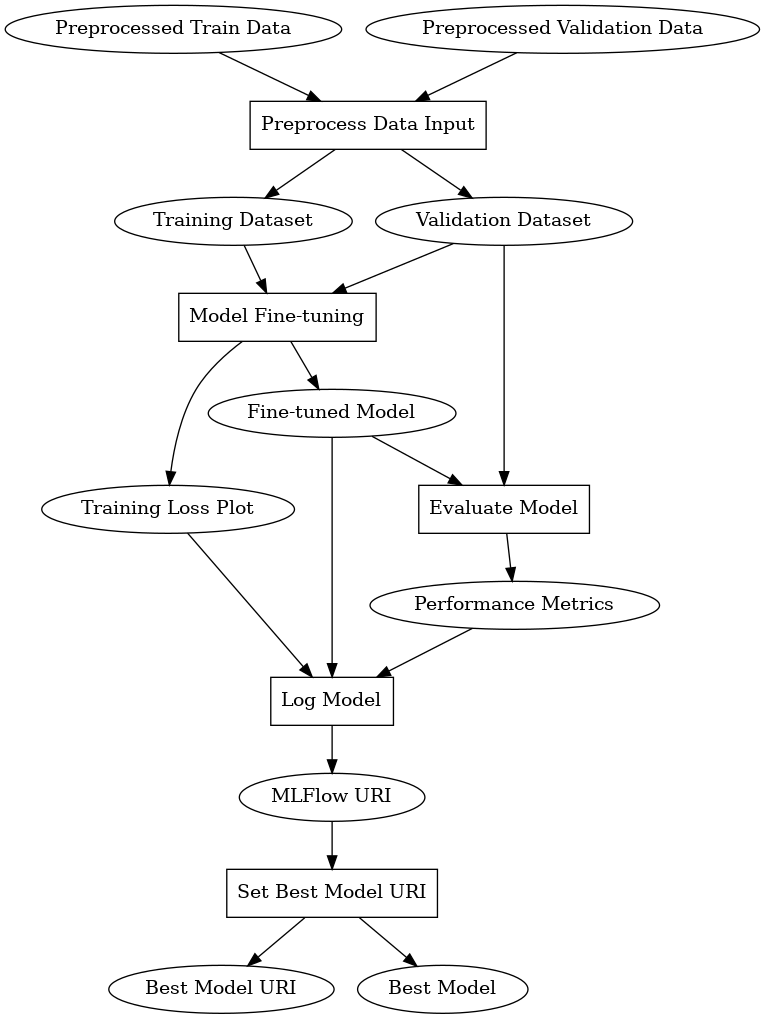

In [ ]:
from graphviz import Digraph

# Define the pipeline diagram
diagram = Digraph("Model_Training_Pipeline", format="png")

# Nodes for each stage
diagram.node("A", "Preprocess Data Input", shape="box")
diagram.node("B", "Model Fine-tuning", shape="box")
diagram.node("C", "Evaluate Model", shape="box")
diagram.node("D", "Log Model", shape="box")
diagram.node("E", "Set Best Model URI", shape="box")

# Inputs and outputs
diagram.node("F", "Preprocessed Train Data", shape="ellipse")
diagram.node("G", "Preprocessed Validation Data", shape="ellipse")
diagram.node("H", "Training Dataset", shape="ellipse")
diagram.node("I", "Validation Dataset", shape="ellipse")
diagram.node("J", "Fine-tuned Model", shape="ellipse")
diagram.node("K", "Training Loss Plot", shape="ellipse")
diagram.node("L", "Performance Metrics", shape="ellipse")
diagram.node("M", "MLFlow URI", shape="ellipse")
diagram.node("N", "Best Model URI", shape="ellipse")
diagram.node("O", "Best Model", shape="ellipse")

# Edges to connect nodes
diagram.edges(
    [
        ("F", "A"),  # Preprocessed Train Data -> Preprocess Data Input
        ("G", "A"),  # Preprocessed Validation Data -> Preprocess Data Input
        ("A", "H"),  # Preprocess Data Input -> Training Dataset
        ("A", "I"),  # Preprocess Data Input -> Validation Dataset
        ("H", "B"),  # Training Dataset -> Model Fine-tuning
        ("I", "B"),  # Validation Dataset -> Model Fine-tuning
        ("B", "J"),  # Model Fine-tuning -> Fine-tuned Model
        ("B", "K"),  # Model Fine-tuning -> Training Loss Plot
        ("J", "C"),  # Fine-tuned Model -> Evaluate Model
        ("I", "C"),  # Validation Dataset -> Evaluate Model
        ("C", "L"),  # Evaluate Model -> Performance Metrics
        ("J", "D"),  # Fine-tuned Model -> Log Model
        ("L", "D"),  # Performance Metrics -> Log Model
        ("K", "D"),  # Training Loss Plot -> Log Model
        ("D", "M"),  # Log Model -> MLFlow URI
        ("M", "E"),  # MLFlow URI -> Set Best Model URI
        ("E", "N"),  # Set Best Model URI -> Best Model URI
        ("E", "O"),  # Set Best Model URI -> Best Model
    ]
)

# Render the diagram to an image file and display it
diagram.render("./images/Model_Training_Pipeline_Diagram", format="png", cleanup=True)
# Display the image in the notebook

Image(filename="./images/Model_Training_Pipeline_Diagram.png")